In [1]:
#Neural network required libraries -------------------------
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

#Data & Visualization required libraries -------------------------
from keras.datasets import cifar10
import matplotlib.pyplot as plt

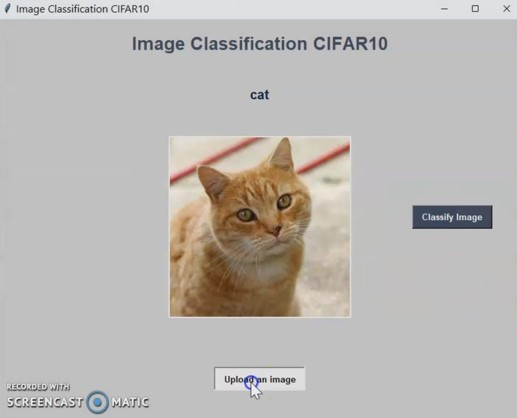

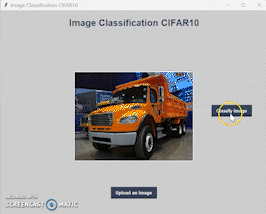

## Load the dataset from keras datasets module

In [2]:
(train_X, train_Y), (test_X, test_Y) = cifar10.load_data()

## Visualise data set

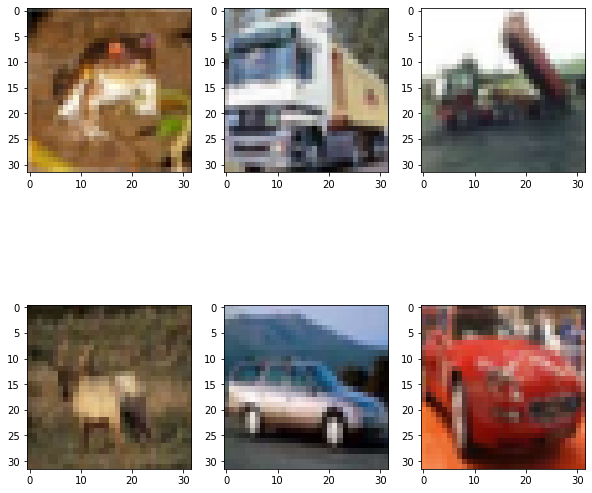

In [3]:
#plot example images from dataset for visualization
#This dataset contains images of low resolution (32*32)
n=6

fig = plt.figure(figsize=(10,10))

for i in range(n):
    fig.add_subplot(2, 3, i+1)
    plt.imshow(train_X[i])

## Convert pixel unsigned integer value (0 to 255) to float type and then normalize the dataset

In [4]:
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
 
train_X=train_X/255.0
test_X=test_X/255.0

## Understanding the shape of dataset

In [5]:
print("shape of training dataset x:", train_X.shape)
#print("training dataset X:", train_X)
print("shape of training dataset Y:", train_Y.shape)
#print("training dataset Y:", train_Y)

shape of training dataset x: (50000, 32, 32, 3)
shape of training dataset Y: (50000, 1)


## To one hot encode labelled y dataset

In [6]:
#print(train_Y[:10])
train_Y=np_utils.to_categorical(train_Y) 
#print(train_Y[:10])
test_Y=np_utils.to_categorical(test_Y)
 
num_classes=test_Y.shape[1]
print("shape of training dataset Y:", train_Y.shape)

shape of training dataset Y: (50000, 10)


## Create Neural network

In [10]:
# Defining number of nodes and hidden layer in neural network
model=Sequential()
#Input layer ---------------------------------------------------
model.add(Conv2D(32,(3,3), #kernel of (3x3) slides over each RGB layers of each image (total 50000 images) 
                 input_shape=(32,32,3), #each image is made up of 3 layers of RGB colours, which in turn is made up of 32 by 32 pixels, where each pixel is represented by a usigned integer uint8 that is normized.
                 padding='same', #padding has two option:'valid' or 'same'. "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input. padding prevent edge pixel data from being trimmed off while producing output the same size as input. 
                 activation='relu', #f_wb function chosen as relu function
                 kernel_constraint=maxnorm(3), #A way of regularizing the weights. maxnorm(m) will, if the L2-Norm of your weights exceeds 3, scale your whole weight matrix by a factor that reduces the norm to 3. 
                 name ='L1'
                )
         )
model.add(Dropout(0.2)) #A way of regularizing - the dropout rate is set to 20%, meaning that one in five inputs to the next layer will be randomly excluded 

#L2 ------------------------------------------------------------
model.add(Conv2D(32,(3,3),
                 activation='relu',
                 padding='same',
                 kernel_constraint=maxnorm(3), 
                 name ='L2'
                )
         )
model.add(MaxPooling2D(pool_size=(2,2))) #similar to Conv2D but taking the maximum value of the kernel thats striding along the matrix to reduce (2,2) to (1) representing pixel.
model.add(Flatten()) #reduces the input data into a single dimension instead of 2 dimensions. Since the input is (32 by 32 by 3) - 32 by 32 pixel of RGB so we need to convert it into single matrix.

#L3 ------------------------------------------------------------
model.add(Dense(512,activation='relu',
                kernel_constraint=maxnorm(3), 
                name ='L3'
               )
         )
model.add(Dropout(0.5))

#Output Layer -------------------------------------------------------------
model.add(Dense(num_classes, 
                activation='softmax', 
                name='Output_layer')
         )

# Setting loss function and optimizing function-----------------
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
 
model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Conv2D)                 (None, 32, 32, 32)        896       
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 L2 (Conv2D)                 (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 L3 (Dense)                  (None, 512)               4194816   
                                                      

In [12]:
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=50,batch_size=32)#the number below the epoch number is the total number of batches flowing into the network. Each batch is of a size of 32 so 50,000/32=1562.5 roughly

Epoch 1/50
1563/1563 [==============================] - 65s 41ms/step - loss: 1.7036 - accuracy: 0.3821 - val_loss: 1.4044 - val_accuracy: 0.4923
Epoch 2/50
1563/1563 [==============================] - 62s 40ms/step - loss: 1.3401 - accuracy: 0.5194 - val_loss: 1.2648 - val_accuracy: 0.5502
Epoch 3/50
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1836 - accuracy: 0.5773 - val_loss: 1.1005 - val_accuracy: 0.6079
Epoch 4/50
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0746 - accuracy: 0.6185 - val_loss: 1.0463 - val_accuracy: 0.6290
Epoch 5/50
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9826 - accuracy: 0.6510 - val_loss: 1.0523 - val_accuracy: 0.6306
Epoch 6/50
1563/1563 [==============================] - 63s 41ms/step - loss: 0.9031 - accuracy: 0.6794 - val_loss: 0.9889 - val_accuracy: 0.6521
Epoch 7/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8371 - accuracy: 0.7012 - val_loss: 0.9759 -

In [13]:
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 2s 6ms/step - loss: 1.2565 - accuracy: 0.7032
70.31999826431274


In [14]:
model.save("model1_cifar_10epoch.h5")

In [16]:
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("C:/Users\/krhen/Desktop/Python Practice/Machine Learning/Image Classification/Test data/Truck1.jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
filename = im.filename.split('/')[-1]
 
im_compressed=im.resize((32,32))
im_compressed=np.expand_dims(im_compressed,axis=0)
im_compressed=np.array(im_compressed)
pred=model.predict([im_compressed])[0]
print('Prediction corresponds to results:', np.argmax(pred))
print("The image is predicted to be:", results[np.argmax(pred)])
im_compressed = np.reshape(im_compressed,(32, 32, 3))

1/1 [==============================] - 0s 106ms/step
Prediction corresponds to results: 9
The image is predicted to be: truck


Text(0.5, 1.0, 'Truck1.jpg predicted as a truck')

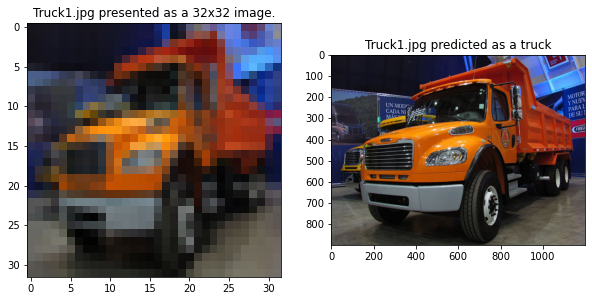

In [17]:
# create figure with figsize
fig = plt.figure(figsize=(10,10))

#Add a subplot at the 1st position
fig.add_subplot(1, 2, 1)
#Show image
plt.imshow(im_compressed)
plt.title('{} presented as a 32x32 image.'.format(filename))

#Add a subplot at the 2nd position
fig.add_subplot(1, 2, 2)
#Show image
plt.imshow(im)
plt.title('{} predicted as a {}'.format(filename,results[np.argmax(pred)]))

## Image Classification GUI

In [18]:
import tkinter as tk
from tkinter import filedialog
from tkinter import*
from PIL import ImageTk, Image
from keras.models import load_model

In [19]:
#To load the trained model from above
model = load_model('model1_cifar_10epoch.h5')

In [20]:
#dictionary to label all the CIFAR-10 dataset classes.
classes = { 
    0:'aeroplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck' 
}

In [26]:
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Image Classification CIFAR10')
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

In [27]:
#Define image load function of GUI - load image and predict its class and print the class predicted.
def classify(file_path):
    #global label_packed
    image = Image.open(file_path)
    image = image.resize((32,32))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    pred = model.predict([image])[0]
    pred = np.argmax(pred)
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) #label of class will be reconfigured and showing the class/sign.
 

 #Define function to create classify button in GUI
    #padx: Extra space added to the left and right of the text within the widget. Default is 1.
    #pady: Extra space added above and below the text within the widget. Default is 1.
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
                      command=lambda: classify(file_path),padx=10,pady=5) 
    classify_b.configure(background='#364156', foreground='white',
                         font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

#Define upload image function
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
                          (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)#Convert uploaded image to Tkinter-compatible photo image 
        
        sign_image.configure(image=im) # setting im as the static image to be displayed in sign_image label widget
        sign_image.image=im # Display image set, im.
        label.configure(text='') #after upload button is pressed, command of function upload_image will be run and label of class will be cleared.
        
        show_classify_button(file_path)
    except:
        pass

In [28]:
upload=Button(top,text="Upload an image",command=upload_image,
              padx=10,pady=5)

upload.configure(background='#364156', foreground='white',
                 font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50) #Pack geometry manager packs widgets relative to the earlier widget. Put the button - "upload an image" at the bottom of the GUI window.

sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)

heading = Label(top, text="Image Classification CIFAR10",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()

top.mainloop()